In [1]:
%matplotlib inline 
from bs4 import BeautifulSoup
import urllib2
import requests
import pandas as pd
import re
import time
import numpy as np
import json
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import matplotlib.pyplot as plt
from pyquery import PyQuery as pq
dropbox = "C:\Users\mkkes_000\Dropbox\Indiastuff\OutputTables"

In [2]:
with open(dropbox + "\candidate_pages.json") as json_file:
    pol_pages = json.load(json_file) # Next iterations will start from here!

In [54]:
def find_year(link):
    year = re.findall('\d+', link)
    return int(year[0])

In [55]:
find_year("http://www.myneta.info/andhra2014/index.php?action=affidavitComparison&myneta_folder2=ap09&id1=2150&id2=2415")

2014

### First we start with the income data for each candidate, collecting all info in a csv file. ###

In [8]:
cleaner = lambda e: int(re.findall('\d+', e.replace(',', '').split(" ~ ")[0])[0])
income_cols = ["Relation","PAN","Year","Income"]

def income_table(candidate_id):
    page_candidate = pol_pages[candidate_id]
    c_soup = BeautifulSoup(page_candidate,"html.parser")
    table_titles =[x.get_text().strip() for x in c_soup.findAll("h3")]
    tables = [x.find_next() for x in c_soup.findAll("h3")]
    dict_tab = dict(zip(table_titles,tables))
    income_tab = dict_tab['Details of PAN and status of Income Tax return']
    income_rows = income_tab.find_all("tr")
    dict_income = {}
    df_inc = pd.DataFrame([])
    if income_cols==[]:
        dict_income = {'HH':{"Year":np.nan,"PAN":"N","Relation":np.nan,"Income":np.nan}}
    else:
        for r in income_rows[1:]:
            list_items = [x.get_text() for x in r.findAll("td")]
            if len(list_items)==4 and list_items[3]!="Nil":
                list_items[3] = cleaner(list_items[3])
            if len(list_items)==4 and list_items[3]=="Nil":
                list_items[3] = 0
            dict_income[list_items[0]] = dict(zip(income_cols,list_items))
        df_inc = df_inc.from_dict(dict_income,orient = "index")
    try:
        df_inc = df_inc[df_inc.PAN=="Y"]
        HHinc = np.sum(df_inc['Income'])
        HHDeclarations = np.count_nonzero(df_inc['PAN'])
        self_income = dict_income['self']['Income']
        self_declare = dict_income['self']['PAN']
    except AttributeError:
        df_inc=df_inc
        HHinc = np.nan
        HHDeclarations = 0
        self_income = np.nan
        self_declare = np.nan
    newdict = {'self_inc':self_income,'self_declare':self_declare,'HHinc':HHinc,"HHDeclarations":HHDeclarations}
    return newdict

In [14]:
candidate_id = pol_pages.keys()[5]
print candidate_id
page_candidate = pol_pages[candidate_id]
c_soup = BeautifulSoup(page_candidate,"html.parser")
table_titles =[x.get_text().strip() for x in c_soup.findAll("h3")]
tables = [x.find_next() for x in c_soup.findAll("h3")]
dict_tab = dict(zip(table_titles,tables))
dict_tab.keys()
#    income_tab = dict_tab['Details of PAN and status of Income Tax return']
#    income_rows = income_tab.find_all("tr")
#    dict_income = {}
#    df_inc = pd.DataFrame([])
#    if income_cols==[]:
#        dict_income = {'HH':{"Year":np.nan,"PAN":"N","Relation":np.nan,"Income":np.nan}}
#    else:
#        for r in income_rows[1:]:
#            list_items = [x.get_text() for x in r.findAll("td")]
#            if len(list_items)==4 and list_items[3]!="Nil":
#                list_items[3] = cleaner(list_items[3])
#            if len(list_items)==4 and list_items[3]=="Nil":
#                list_items[3] = 0
#            dict_income[list_items[0]] = dict(zip(income_cols,list_items))
#        df_inc = df_inc.from_dict(dict_income,orient = "index")
#    try:
   #     df_inc = df_inc[df_inc.PAN=="Y"]
    #    HHinc = np.sum(df_inc['Income'])
     #   HHDeclarations = np.count_nonzero(df_inc['PAN'])
      #  self_income = dict_income['self']['Income']
       # self_declare = dict_income['self']['PAN']
   # except AttributeError:
    #    df_inc=df_inc
     #   HHinc = np.nan
      #  HHDeclarations = 0
       # self_income = np.nan
        #self_declare = np.nan
    #newdict = {'self_inc':self_income,'self_declare':self_declare,'HHinc':HHinc,"HHDeclarations":HHDeclarations}

http://myneta.info/ls2009/candidate.php?candidate_id=8732


[u'Educational Details',
 u'Details of Liabilities',
 u'Crime-O-Meter',
 u'Assets & Liabilities',
 u'Details of Immovable Assets',
 u'Details of Criminal Cases',
 u'Details of Movable Assets',
 u'HelpLine & SMS',
 u'Connect with us',
 u'Myneta Android App',
 u'If you notice any discrepancy between affidavits and our data, you can use the message box below to send a message to us.',
 u'Find us on facebook']

In [33]:
%%time
counterror = 0
dict_allinc = {}
if any("Details of PAN and status of Income Tax return" in dict_tab.keys())==False:
    break
else:
    for k,cid in enumerate(pol_pages.keys()):
        year = find_year(cid)
        try:
            dict_allinc[cid] = income_table(cid)
        except TypeError:
            counterror = counterror+1
            print "Error with this page: ", cid
        except KeyError:
            counterror = counterror+1
            print "Error with this page: ", cid
        if k%100==0:
            print k,
print "\n Number of errors: ", counterror

SyntaxError: 'break' outside loop (<timed exec>, line 4)

In [ ]:
d_inc_HH=pd.DataFrame([])
d_inc_HH = d_inc_HH.from_dict(dict_allinc,orient = "index") #d_inc_HH associates income to all candidates
                                                             # as well as for the whole family
                                                             # and the number of declarations
d_inc_HH.to_csv("C:\Users\mkkes_000\Dropbox\Indiastuff\OutputTables\incomes.csv", index=True)
d_inc_HH.head()

In [ ]:
#This part is just to play a bit with incomes
d_inc = d_inc_HH.copy()
d_inc['ln_HHinc'] = np.log(d_inc['HHinc'])
d_inc['ln_selfinc'] = np.log(d_inc['self_inc'])
d_inc['sh_self'] = d_inc['self_inc']/d_inc['HHinc']
sns.kdeplot(d_inc.ln_HHinc)
sns.kdeplot(d_inc.ln_selfinc)

In [23]:
d_inc[d_inc.HHinc!=0].describe()

,HHinc,HHDeclarations,self_inc,ln_HHinc,ln_selfinc,sh_self
count,3.797000e+03,5965.000000,3.797000e+03,3797.000000,3797.000000,3797.000000
mean,2.907485e+06,1.146857,2.010333e+06,13.377243,-inf,0.754972
std,3.334908e+07,1.076341,2.396129e+07,1.336438,NaN,0.325898
min,1.670000e+02,0.000000,0.000000e+00,5.117994,-inf,0.000000
25%,2.609200e+05,0.000000,2.023000e+05,12.471969,12.217507,0.532683
50%,5.855120e+05,1.000000,3.750000e+05,13.280242,12.834681,0.991629
75%,1.295175e+06,2.000000,8.150000e+05,14.074156,13.610943,1.000000
max,1.684165e+09,6.000000,1.016221e+09,21.244536,20.739357,8.000000


### In this second part we look at the personal information for each candidate. ###

In [58]:
cols = ['year','cid','full_name','district','state','party_full','address','self_profession','spouse_profession','age']
def personal_info(candidate_id):
    year = find_year(candidate_id)
    page_candidate = pol_pages[candidate_id]
    c_soup = BeautifulSoup(page_candidate,"html.parser")
    personal = c_soup.findAll(attrs={"class": "grid_3 alpha"})[0]
    full_name = personal.find("h2").get_text().strip().title()
    district1 = personal.find("h5").get_text().strip()
    district = district1.title()
    state = district1[district1.find("(")+1:district1.find(")")].title()
    grid2 = personal.findAll(attrs={"class":"grid_2 alpha"})
    party_full = grid2[0].get_text().split(":")[1].split("\n")[0]
    age = grid2[2].get_text().split(":")[1].split("\n")[0]
    try:
        age = float(age)
    except ValueError:
        age = np.nan
    address = grid2[3].get_text().split(":")[1].split("\n")[1].strip() # Careful this one changes
    if personal.find("p").get_text()=="":
        self_profession = ""
        spouse_profession = ""
    else:
        self_profession = personal.find("p").get_text().split('\n')[0].split(":")[1].capitalize()
        spouse_profession = personal.find("p").get_text().split('\n')[1].split(":")[1].capitalize()
    list_info = [candidate_id,full_name,district,state,party_full,address,self_profession,spouse_profession]
    list_encode = [year]+[x.encode('utf-8') for x in list_info]+[age]
    dict_info = dict(zip(cols,list_encode))
    return dict_info

In [59]:
%%time
counterror = 0
dict_allcand = {}
for k,cid in enumerate(pol_pages.keys()):
    try:
        dict_allcand[cid] = personal_info(cid)
    except TypeError:
        counterror = counterror+1
        print "Error with this page: ", cid
    if k%100==0:
        print k,
print "Number of errors: ", counterror

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

In [34]:
d_perso_info = pd.DataFrame([])
d_perso_info = d_perso_info.from_dict(dict_allcand, orient="index") # Dumping into a dataframe
d_perso_info.to_csv("C:\Users\mkkes_000\Dropbox\Indiastuff\OutputTables\info_perso_LS.csv",index = True)

In [36]:
d_perso_info[d_perso_info.self_profession!=""].head(10)

,self_profession,party_full,district,cid,age,state,full_name,address,spouse_profession
http://myneta.info/ls2014/candidate.php?candidate_id=10,Social worker,SUCI(C),Kottayam (Kerala),http://myneta.info/ls2014/candidate.php?candid...,46,Kerala,N.K.Biju,"Naduvathuseril, Sachivothamapuramla, Kottayam",Social worker
http://myneta.info/ls2014/candidate.php?candidate_id=100,Leader of opposition rajya sabha,BJP,Amritsar (Punjab),http://myneta.info/ls2014/candidate.php?candid...,61,Punjab,Arun Jaitley,A-44 Kailash Colony New Delhi 110048,House wife
http://myneta.info/ls2014/candidate.php?candidate_id=1000,Bussiness/self emplyed,IND,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,38,National Capital Territory Of Delhi,Amit Kumar Sharma,"506, CHANDER LOK MANDOLI ROAD SHAHDOR DELHI-93",Bussiness/ self employed
http://myneta.info/ls2014/candidate.php?candidate_id=1001,Property dealer,JKNPP,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,33,National Capital Territory Of Delhi,Mohd Hasnan Khan,B1/498 GALI NO 4 V BLOK VIJAY PARK DELHI 53,
http://myneta.info/ls2014/candidate.php?candidate_id=1002,Business,National Loktantrik Party,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,56,National Capital Territory Of Delhi,Roshan Ali,"A-544, 6 NO-15 SRI RAM COLONY RAJIV NAGAR DELH...",House wife
http://myneta.info/ls2014/candidate.php?candidate_id=1003,Nothing,IND,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,78,National Capital Territory Of Delhi,H.K. Mahendru,"120, Pocket-D, Dislhad Garden Delhi",
http://myneta.info/ls2014/candidate.php?candidate_id=1004,Self employee,AITC,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,26,National Capital Territory Of Delhi,Mohd Arif Siddique,"D-1/75, G.NO.-1, Nehru Vihar Mustfabad Delhi-94",
http://myneta.info/ls2014/candidate.php?candidate_id=1005,Social worker and business,SHS,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,49,National Capital Territory Of Delhi,Om Dutt Sharma,"House No. 1/11820/1, Block- C, Opposite Parsur...",House wife
http://myneta.info/ls2014/candidate.php?candidate_id=1006,Tuetor (teachy),Ambedkar National Congress,North East Delhi (National Capital Territory ...,http://myneta.info/ls2014/candidate.php?candid...,31,National Capital Territory Of Delhi,Pradesh Kumar,"10/375-B, Mandoli Extn. Delhi-93",Tuetor (teachy)
http://myneta.info/ls2014/candidate.php?candidate_id=1008,Student,AITC,Kairana (Uttar Pradesh),http://myneta.info/ls2014/candidate.php?candid...,29,Uttar Pradesh,Diwakar,"Resident Of H.No. 1096, Shivpuri Hapur",House hold


In [62]:
d_perso_info.describe()

,age
count,8128.000000
mean,47.197219
std,11.929827
min,21.000000
25%,38.000000
50%,46.000000
75%,56.000000
max,93.000000


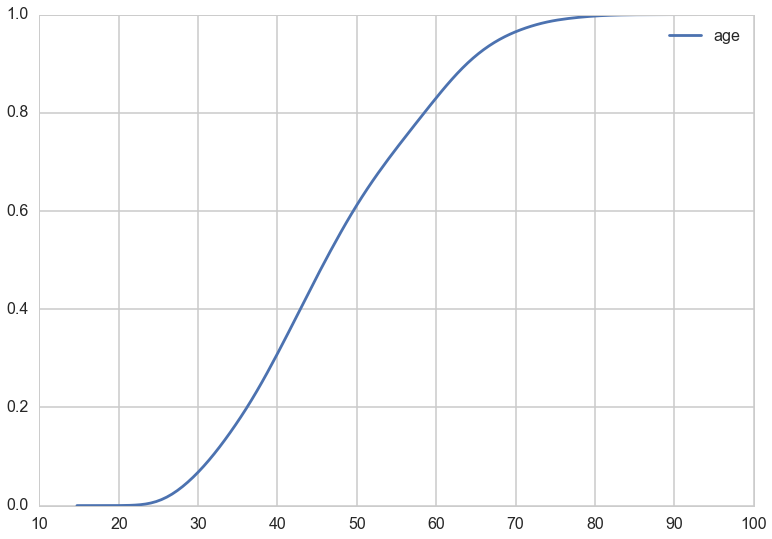

In [68]:
sns.kdeplot(d_perso_info.age.dropna(),cumulative=True)